# Imports

In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from google.colab import files
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, normalize
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV,KFold
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,fbeta_score

Using TensorFlow backend.


In [2]:
uploaded = files.upload()

Saving dopo_eda.csv to dopo_eda.csv


In [3]:
df = pd.read_csv("/content/dopo_eda.csv")
df.head()

,Unnamed: 0,text,label
0,0,econom recoveri nation climat pledg must desig...,0.0
1,1,difficult time it’ hard connect natur world ea...,0.0
2,2,decis postpon cop unavoid collect prioriti mus...,0.0
3,3,japan world’ fifth largest emitt greenhous gas...,0.0
4,4,countri includ naturebasedsolut climat plan nd...,0.0


In [4]:
df.drop("Unnamed: 0", axis = 1,inplace = True)
df.head()

,text,label
0,econom recoveri nation climat pledg must desig...,0.0
1,difficult time it’ hard connect natur world ea...,0.0
2,decis postpon cop unavoid collect prioriti mus...,0.0
3,japan world’ fifth largest emitt greenhous gas...,0.0
4,countri includ naturebasedsolut climat plan nd...,0.0


In [5]:
for i in range(len(df)):
    if df.label[i] != df.label[i]:
        print(df.loc[i])
        df.drop(i, inplace = True)

text     billion upon billion hard earn tax dollar spen...
label                                                  NaN
Name: 18007, dtype: object


# One-Hot Encoding (Count Vectorizing)

In [6]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        param_grid = {}# Create a based model
       # param_grid = {
       #    'penalty': ['l1'],
       #     'C': [0,0.1,0.5,1,5,10,100],
      #      'solver': ['lbfgs','liblinear','sag',"saga", "newton-cg"],
      #      'multi_class': ['ovr']  
      #  }# Create a based model

        clf = LogisticRegression()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))     

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


 For test size =  0.25  and number of folds  5

The score: 0.912

Test set score : 0.918

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1894
         1.0       0.92      0.94      0.93      2608

    accuracy                           0.92      4502
   macro avg       0.92      0.91      0.92      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished


 For test size =  0.25  and number of folds  10

The score: 0.9198

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1885
         1.0       0.92      0.93      0.92      2617

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.6s finished


 For test size =  0.25  and number of folds  15

The score: 0.9152

Test set score : 0.920

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      1846
         1.0       0.93      0.94      0.93      2656

    accuracy                           0.92      4502
   macro avg       0.92      0.92      0.92      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.9s finished


 For test size =  0.25  and number of folds  20

The score: 0.9171

Test set score : 0.908

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1843
         1.0       0.92      0.92      0.92      2659

    accuracy                           0.91      4502
   macro avg       0.91      0.90      0.90      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


 For test size =  0.3  and number of folds  5

The score: 0.9112

Test set score : 0.911

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      2312
         1.0       0.92      0.92      0.92      3091

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


 For test size =  0.3  and number of folds  10

The score: 0.9119

Test set score : 0.912

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2245
         1.0       0.92      0.93      0.93      3158

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.5s finished


 For test size =  0.3  and number of folds  15

The score: 0.9166

Test set score : 0.914

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2201
         1.0       0.92      0.93      0.93      3202

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished


 For test size =  0.3  and number of folds  20

The score: 0.9149

Test set score : 0.915

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      2307
         1.0       0.92      0.94      0.93      3096

    accuracy                           0.92      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


 For test size =  0.35  and number of folds  5

The score: 0.9107

Test set score : 0.909

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      2603
         1.0       0.91      0.93      0.92      3700

    accuracy                           0.91      6303
   macro avg       0.91      0.90      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


 For test size =  0.35  and number of folds  10

The score: 0.9177

Test set score : 0.911

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2622
         1.0       0.92      0.93      0.92      3681

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.1s finished


 For test size =  0.35  and number of folds  15

The score: 0.9131

Test set score : 0.914

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      2640
         1.0       0.92      0.93      0.93      3663

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished


 For test size =  0.35  and number of folds  20

The score: 0.9129

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      2587
         1.0       0.92      0.94      0.93      3716

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


 For test size =  0.4  and number of folds  5

The score: 0.9068

Test set score : 0.916

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      2999
         1.0       0.92      0.94      0.93      4204

    accuracy                           0.92      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.92      0.92      0.92      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


 For test size =  0.4  and number of folds  10

The score: 0.9102

Test set score : 0.911

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2987
         1.0       0.92      0.93      0.92      4216

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.2s finished


 For test size =  0.4  and number of folds  15

The score: 0.9094

Test set score : 0.914

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      3005
         1.0       0.92      0.93      0.93      4198

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.8s finished


 For test size =  0.4  and number of folds  20

The score: 0.9146

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2935
         1.0       0.92      0.93      0.92      4268

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203




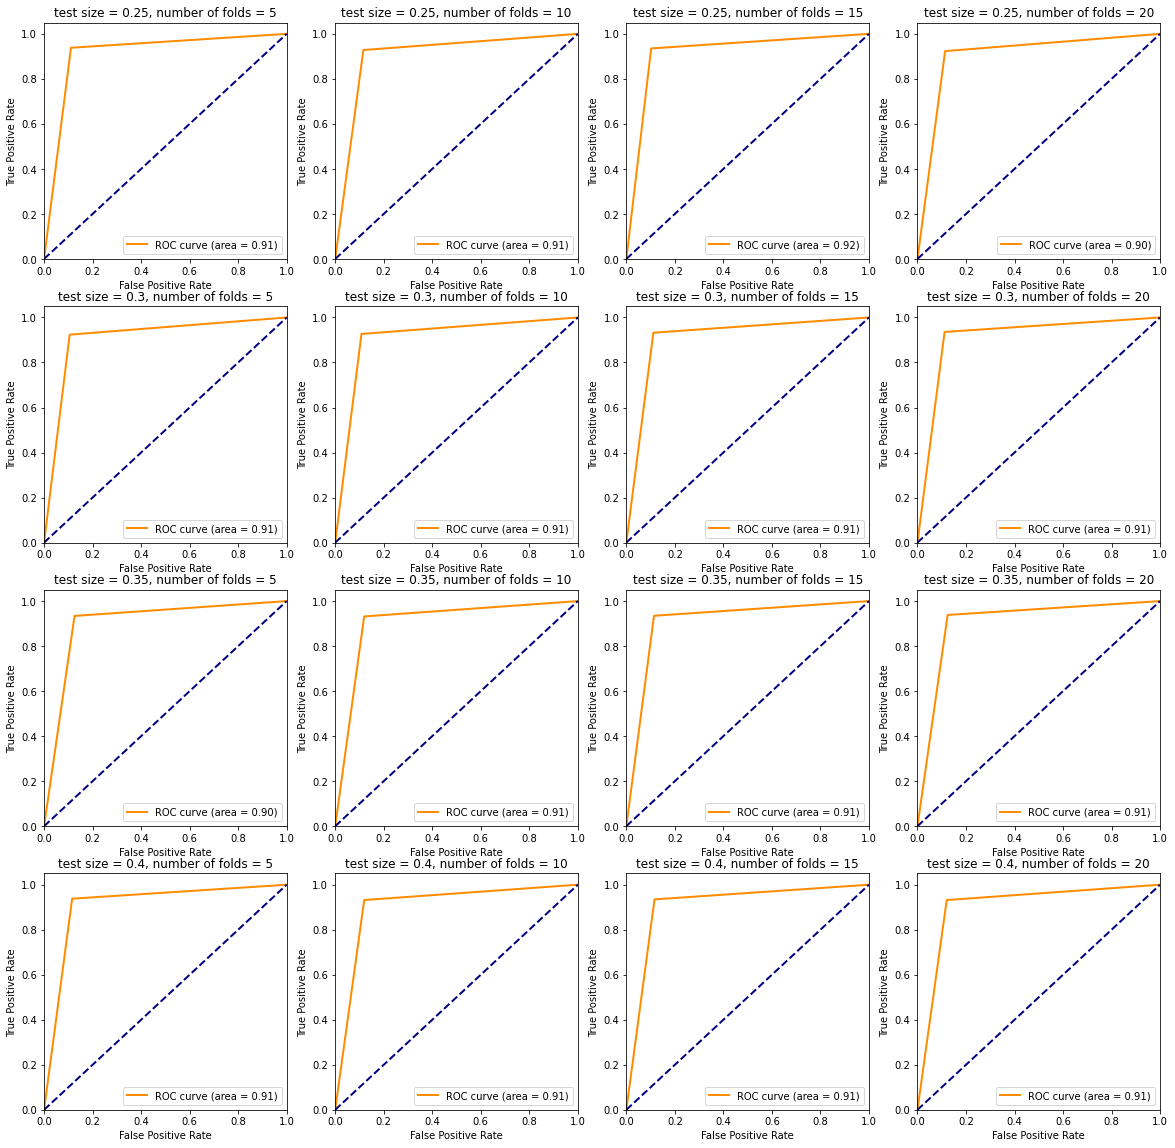

In [7]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()

# TF-IDF Transform

In [8]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        
        param_grid = {
           # 'penalty': ['l2'],
          #  'C': [0,0.1,0.5,1,5,10,100],
          #  'solver': ['lbfgs','liblinear','sag'],
          #  'multi_class': ['ovr']
        }# Create a based model

        clf = LogisticRegression()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


 For test size =  0.25  and number of folds  5

The score: 0.9117

Test set score : 0.920

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1799
         1.0       0.94      0.92      0.93      2703

    accuracy                           0.92      4502
   macro avg       0.92      0.92      0.92      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


 For test size =  0.25  and number of folds  10

The score: 0.9155

Test set score : 0.917

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1898
         1.0       0.92      0.93      0.93      2604

    accuracy                           0.92      4502
   macro avg       0.92      0.91      0.91      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.3s finished


 For test size =  0.25  and number of folds  15

The score: 0.9155

Test set score : 0.921

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      1877
         1.0       0.93      0.94      0.93      2625

    accuracy                           0.92      4502
   macro avg       0.92      0.92      0.92      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.1s finished


 For test size =  0.25  and number of folds  20

The score: 0.918

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1926
         1.0       0.92      0.93      0.92      2576

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


 For test size =  0.3  and number of folds  5

The score: 0.9116

Test set score : 0.916

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2213
         1.0       0.93      0.93      0.93      3190

    accuracy                           0.92      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


 For test size =  0.3  and number of folds  10

The score: 0.9128

Test set score : 0.919

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2210
         1.0       0.93      0.93      0.93      3193

    accuracy                           0.92      5403
   macro avg       0.92      0.92      0.92      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.5s finished


 For test size =  0.3  and number of folds  15

The score: 0.9142

Test set score : 0.922

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      2208
         1.0       0.93      0.93      0.93      3195

    accuracy                           0.92      5403
   macro avg       0.92      0.92      0.92      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.4s finished


 For test size =  0.3  and number of folds  20

The score: 0.9159

Test set score : 0.919

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2214
         1.0       0.93      0.93      0.93      3189

    accuracy                           0.92      5403
   macro avg       0.92      0.92      0.92      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


 For test size =  0.35  and number of folds  5

The score: 0.91

Test set score : 0.915

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2589
         1.0       0.93      0.93      0.93      3714

    accuracy                           0.92      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.92      0.92      0.92      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


 For test size =  0.35  and number of folds  10

The score: 0.913

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2566
         1.0       0.92      0.93      0.93      3737

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.8s finished


 For test size =  0.35  and number of folds  15

The score: 0.9146

Test set score : 0.917

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      2613
         1.0       0.92      0.94      0.93      3690

    accuracy                           0.92      6303
   macro avg       0.92      0.91      0.91      6303
weighted avg       0.92      0.92      0.92      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.8s finished


 For test size =  0.35  and number of folds  20

The score: 0.9106

Test set score : 0.915

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      2604
         1.0       0.93      0.93      0.93      3699

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


 For test size =  0.4  and number of folds  5

The score: 0.9095

Test set score : 0.914

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      3007
         1.0       0.92      0.93      0.93      4196

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


 For test size =  0.4  and number of folds  10

The score: 0.9139

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      3040
         1.0       0.92      0.93      0.92      4163

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.8s finished


 For test size =  0.4  and number of folds  15

The score: 0.9105

Test set score : 0.915

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      3036
         1.0       0.92      0.93      0.93      4167

    accuracy                           0.92      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.92      0.92      0.92      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.5s finished


 For test size =  0.4  and number of folds  20

The score: 0.9109

Test set score : 0.918

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      2986
         1.0       0.93      0.93      0.93      4217

    accuracy                           0.92      7203
   macro avg       0.92      0.91      0.92      7203
weighted avg       0.92      0.92      0.92      7203




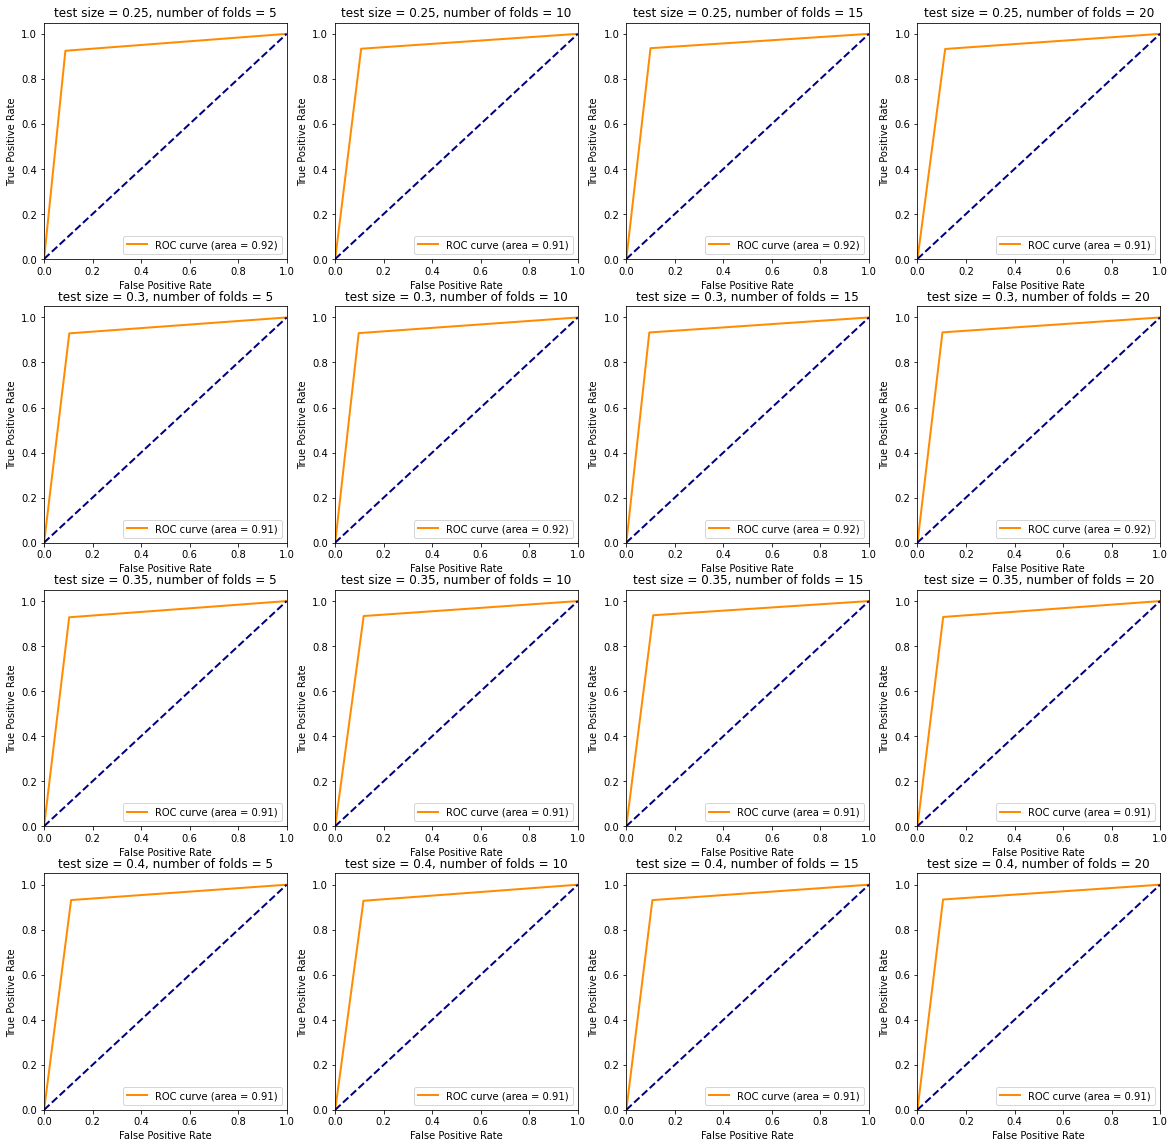

In [9]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()